# Examples for running FLORIS_loads

In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [2]:
floris = Floris("DR_Test_input.json")
#floris = Floris("example_input.json")

## Calculate Wake

In [3]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  0.013901948928833008 s


## Compute Velocities at each Turbine

In [4]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -", turbine.pow_scale)
    #print("\tblade pitch - ", turbine.blade_pitch)
    print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.48164023]
	Ct - [0.7451438]
	power - [4360968.01862392]
	pow_scale - 1.0
	ai - [0.24758358]
	average velocity - 10.794645996274884
(806.0, 0.0):
	Cp - [0.48386296]
	Ct - [0.76254039]
	power - [1933308.43739525]
	pow_scale - 1.0
	ai - [0.25635086]
	average velocity - 8.218286482409525
(1612.0, 0.0):
	Cp - [0.48393499]
	Ct - [0.76330529]
	power - [1598141.47616578]
	pow_scale - 1.0
	ai - [0.2567436]
	average velocity - 7.712545768804017
(2418.0, 0.0):
	Cp - [0.48395989]
	Ct - [0.76356971]
	power - [1536918.08258108]
	pow_scale - 1.0
	ai - [0.25687951]
	average velocity - 7.612643158531598
(3224.0, 0.0):
	Cp - [0.48396929]
	Ct - [0.76366957]
	power - [1514208.55337238]
	pow_scale - 1.0
	ai - [0.25693086]
	average velocity - 7.574913045836023


## Visualization Manager for FLORIS 

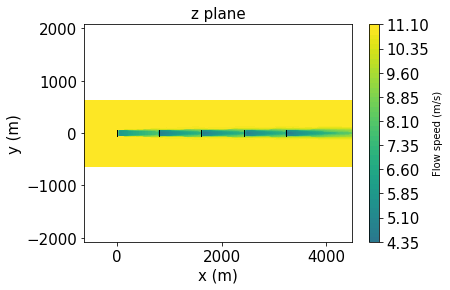

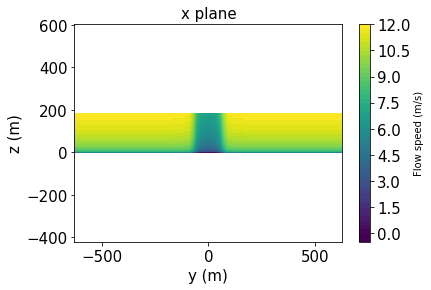

In [5]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
grid_resolution = (100, 100, 50)
visualization_manager = VisualizationManager(ff_viz, grid_resolution)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Test Power Scale Adjusting

In [6]:
turbines    = [turbine for _, turbine in floris.farm.flow_field.turbine_map.items()]
turbines[0].pow_scale = 0.9
floris.farm.flow_field.calculate_wake()

In [7]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -",turbine.pow_scale)
    print("\tai -", turbine.aI)
    #print("\tblade pitch -", turbine.blade_pitch)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.4334762]
	Ct - [0.5953863]
	power - [3924871.13869827]
	pow_scale - 0.9
	ai - [0.18195374]
	average velocity - 10.794645996274884
(806.0, 0.0):
	Cp - [0.48386191]
	Ct - [0.76252922]
	power - [2456443.11474678]
	pow_scale - 1.0
	ai - [0.25634513]
	average velocity - 8.90123185126231
(1612.0, 0.0):
	Cp - [0.48388936]
	Ct - [0.76282072]
	power - [1714511.405492]
	pow_scale - 1.0
	ai - [0.25649472]
	average velocity - 7.895623936287638
(2418.0, 0.0):
	Cp - [0.48395152]
	Ct - [0.76348082]
	power - [1557322.54115985]
	pow_scale - 1.0
	ai - [0.25683381]
	average velocity - 7.646228274476686
(3224.0, 0.0):
	Cp - [0.48396552]
	Ct - [0.76362954]
	power - [1523286.54409474]
	pow_scale - 1.0
	ai - [0.25691027]
	average velocity - 7.590040321158774


## Sweep Power Scale of turbine_0

In [8]:
pow_scale = np.arange(0.6,1.01,0.01)
pow_0 = np.zeros_like(pow_scale)
pow_1 = np.zeros_like(pow_scale)
pow_2 = np.zeros_like(pow_scale)
pow_3 = np.zeros_like(pow_scale)
pow_4 = np.zeros_like(pow_scale)
for p_idx, p in enumerate(pow_scale):
    turbines[0].pow_scale = p
    floris.farm.flow_field.calculate_wake()
    pow_0[p_idx] = turbines[0].power
    pow_1[p_idx] = turbines[1].power
    pow_2[p_idx] = turbines[2].power
    pow_3[p_idx] = turbines[3].power
    pow_4[p_idx] = turbines[4].power

pow_t = pow_0 + pow_1 + pow_2 + pow_3 + pow_4
#pow_t = pow_0 + pow_1

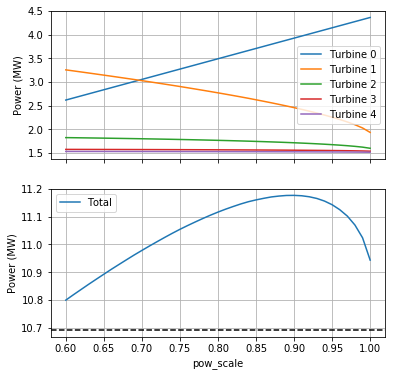

In [9]:
fig, axarr = plt.subplots(2,1,sharex=True,figsize=(6,6))

ax = axarr[0]
ax.plot(pow_scale,pow_0/1E6,label='Turbine 0')
ax.plot(pow_scale,pow_1/1E6,label='Turbine 1')
ax.plot(pow_scale,pow_2/1E6,label='Turbine 2')
ax.plot(pow_scale,pow_3/1E6,label='Turbine 3')
ax.plot(pow_scale,pow_4/1E6,label='Turbine 4')
ax.grid(True)
ax.set_ylabel('Power (MW)')
ax.invert_xaxis()
ax.legend()

ax = axarr[1]
ax.plot(pow_scale,pow_t/1E6,label='Total')
ax.axhline(pow_t[0] * 0.99/1E6,color='k',ls='--')
ax.grid(True)
ax.invert_xaxis()
ax.set_ylabel('Power (MW)')
ax.set_xlabel('pow_scale')
ax.legend()
# fig.savefig('aligned_power.png')
#fig.savefig('Max_offset_power_2WTs.png')
fig.savefig('Max_offset_power_5WTs.png')

## Get Maximum WF Power

In [10]:
pow_max = max(pow_t)
max_index = np.argwhere(pow_t == max(pow_t))
pow_scale_max = pow_scale[max_index[0,0]]

print('The orginal power of WF is',round(pow_t[40]/1e6,2),'MW')
print('The maximum power of WF is',round(pow_max/1e6,2),'MW')
print('The power increase of WF is',round((pow_max-pow_t[40])/1e6,2),'MW')
print('The corresponding power scale:',round(pow_scale_max,2))

The orginal power of WF is 10.94 MW
The maximum power of WF is 11.18 MW
The power increase of WF is 0.23 MW
The corresponding power scale: 0.9


## Sweep Power scales of turbine_0 and turbine_1

In [11]:
pow_scale_0 = np.arange(0.6,1.01,0.01)
pow_scale_1 = np.arange(0.6,1.01,0.01)
pow2_0 = np.zeros([41,41])
pow2_1 = np.zeros([41,41])
pow2_2 = np.zeros([41,41])
pow2_3 = np.zeros([41,41])
pow2_4 = np.zeros([41,41])
for p_idx_0, p0 in enumerate(pow_scale_0):
    turbines[0].pow_scale = p0
    for p_idx_1, p1 in enumerate(pow_scale_1):
        turbines[1].pow_scale = p1
        floris.farm.flow_field.calculate_wake()
        pow2_0[p_idx_0, p_idx_1] = turbines[0].power
        pow2_1[p_idx_0, p_idx_1] = turbines[1].power
        pow2_2[p_idx_0, p_idx_1] = turbines[2].power
        pow2_3[p_idx_0, p_idx_1] = turbines[3].power
        pow2_4[p_idx_0, p_idx_1] = turbines[4].power

pow2_t = pow2_0 + pow2_1 + pow2_2 + pow2_3 + pow2_4

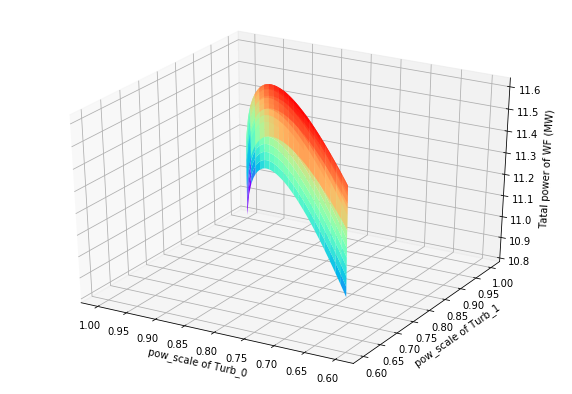

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.invert_xaxis()
#ax.invert_yaxis()
ax.plot_surface(pow_scale_0, pow_scale_1, pow2_t/1e6, \
                rstride=2, cstride=2, cmap=cm.rainbow,linewidth=0.5, antialiased=True)
ax.set_xlabel('pow_scale of Turb_0')
ax.set_ylabel('pow_scale of Turb_1')
ax.set_zlabel('Tatal power of WF (MW)')
plt.show()

In [13]:
pow2_t_max = np.max(pow2_t)
pow2_t_max_idx = np.where(pow2_t == np.max(pow2_t))
pow_scale_0_max = 0.6 + pow2_t_max_idx[0][0]*0.01
pow_scale_1_max = 0.6 + pow2_t_max_idx[1][0]*0.01

print('The orginal power of WF is',round(pow2_t[40][40]/1e6,2),'MW')
print('The maximum power of WF is',round(pow2_t_max/1e6,2),'MW')
print('The power increase of WF is',round((pow2_t_max - pow2_t[40][40])/1e6,2),'MW')
print('The corresponding power scale of Turb_0:',round(pow_scale_0_max,2))
print('The corresponding power scale of Turb_1:',round(pow_scale_1_max,2))

The orginal power of WF is 10.94 MW
The maximum power of WF is 11.62 MW
The power increase of WF is 0.68 MW
The corresponding power scale of Turb_0: 0.9
The corresponding power scale of Turb_1: 0.79
